# Medwin and Clay (1998) Validation

This notebook validates the resonance frequency and damping coefficient calculations in the SeaEcho bubble resonance module by reproducing key figures from Medwin and Clay (1998):

1. **Figure 8.2.1**: Resonance frequency correction parameters vs bubble radius
2. **Figure 8.2.2**: Damping constant vs bubble radius for multiple frequencies

These validations ensure that our bubble acoustic calculations match the established theoretical framework in the literature.

## Import Required Libraries


In [1]:
# Required imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# Add the parent directory to the Python path
sys.path.append('..')

# Import SeaEcho modules
from utils import SeaEcho_water as SeaEcho_water_bubble
from utils import SeaEcho_gas_bubble
from utils.SeaEcho_acoustic_paras import resonance_freq, damping_constant

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Set matplotlib parameters for better display
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("All imports successful!")
print("Matplotlib configured for inline plotting in Jupyter notebook")

All imports successful!
Matplotlib configured for inline plotting in Jupyter notebook


## Define Environmental Parameters

Set up environmental conditions matching Medwin and Clay (1998): 20°C temperature, 35 psu salinity, sea level depth, and calculate sound speed.

In [2]:
# Define environmental parameters following Medwin and Clay (1998)
T = 20  # temperature, [deg C]
S = 35  # seawater salinity, [psu] 
z = 0   # sea level, [m]

# Create seawater object
water = SeaEcho_water_bubble.seawater(T, z, S)

# Calculate sound speed using the water object
c = water.sound_speed()

# Define sonar frequencies for analysis (Weber et al. 2014)
f_analysis = np.array([18, 30], dtype=np.float64)  # sonar frequencies, [kHz]


## Setup Bubble Radius Array

Create a logarithmic array of bubble radii spanning 1-1000 micrometers to match the range in Medwin and Clay Figure 8.2.1.

In [3]:
# Create bubble radius array (1 to 1000 micrometers) with high precision
a = np.logspace(0, 3, dtype=np.float64) * 1e-6  # bubble radius in meters
a_microns = a * 1e6  # convert to micrometers for display

# Initialize arrays for resonance frequency correction parameters with high precision
correction_ratio = np.zeros(len(a), dtype=np.float64)  # f_R/f_b ratio
b_param = np.zeros(len(a), dtype=np.float64)           # b parameter
beta_param = np.zeros(len(a), dtype=np.float64)        # beta parameter


## Calculate Resonance Frequency Corrections (Figure 8.2.1)

Iterate through bubble radii to calculate resonance frequency corrections, reproducing Figure 8.2.1 from Medwin and Clay (1998).

In [4]:
# Calculate resonance frequency correction parameters for each bubble radius
print("Calculating resonance frequency corrections...")

for count, ai in enumerate(a):
    # Create air bubble object (diameter = 2 * radius)
    bubble = SeaEcho_gas_bubble.air_bubble(water, T, z, S, ai * 2)
    
    # Calculate resonance frequency corrections using first analysis frequency
    f_b, f_R, correction_params = resonance_freq(f_analysis[0], c, water, bubble)
    
    # Store correction parameters
    correction_ratio[count] = f_R/f_b
    b_param[count] = correction_params[0]
    beta_param[count] = correction_params[2]
    

print(f"✓ Completed calculations for {len(a)} bubble radii")

Calculating resonance frequency corrections...
✓ Completed calculations for 50 bubble radii


In [5]:
# Reload the module to pick up changes
import importlib
import utils.SeaEcho_acoustic_paras
importlib.reload(utils.SeaEcho_acoustic_paras)
from utils.SeaEcho_acoustic_paras import resonance_freq, damping_constant

# Test precision handling with a single bubble calculation
print("Testing precision handling...")

# Test with first bubble radius
test_ai = a[0]
test_bubble = SeaEcho_gas_bubble.air_bubble(water, T, z, S, test_ai * 2)

print(f"Test bubble radius: {test_ai * 1e6:.1f} μm")
print(f"Bubble diameter: {test_bubble.d}")
print(f"Water pressure: {water.P}")
print(f"Water density: {water.rho}")

# Test resonance calculation
try:
    f_b_test, f_R_test, correction_test = resonance_freq(f_analysis[0], c, water, test_bubble)
    print(f"✓ Resonance calculation successful")
    print(f"  f_b = {f_b_test:.2f} Hz")
    print(f"  f_R = {f_R_test:.2f} Hz")
    print(f"  Correction params: {correction_test}")
    print(f"  Correction param types: {[type(x) for x in correction_test]}")
except Exception as e:
    print(f"✗ Error in resonance calculation: {e}")
    print(f"Error type: {type(e)}")
    
print("-" * 50)

Testing precision handling...
Test bubble radius: 1.0 μm
Bubble diameter: 2e-06
Water pressure: 101300.0
Water density: 1024.8072512898575
✓ Resonance calculation successful
  f_b = 3242861.53 Hz
  f_R = 3834448.31 Hz
  Correction params: [7.14286728e-01 5.95649083e-04 1.95738558e+00]
  Correction param types: [<class 'numpy.longdouble'>, <class 'numpy.longdouble'>, <class 'numpy.longdouble'>]
--------------------------------------------------


## Plot Resonance Frequency Correction Parameters

Create a plot reproducing Figure 8.2.1 from Medwin and Clay (1998), showing correction parameters vs bubble radius.

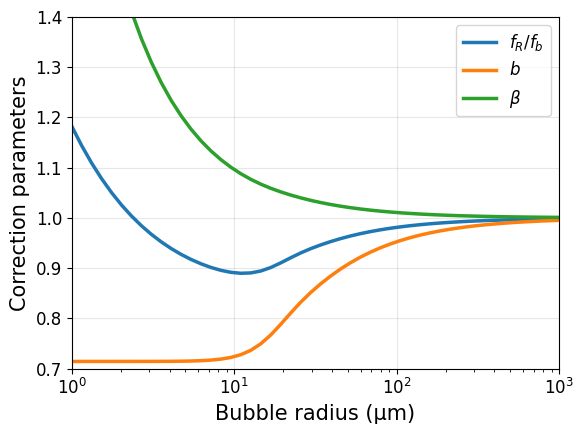

✓ Figure 8.2.1 created and saved to: /Users/wangbinb/Library/CloudStorage/OneDrive-UniversityofMissouri/ONR_project/seaEchoTSCalculator/plots/medwin_clay_fig_8_2_1_resonance_corrections.pdf


In [6]:
# Clear any existing plots
from IPython.display import clear_output

# Create Figure 8.2.1 reproduction: Resonance frequency correction parameters
plt.figure(figsize=(6,4.5))

# Plot the three correction parameters with improved styling and LaTeX labels
plt.plot(a_microns, correction_ratio, color='#1f77b4', linewidth=2.5, label=r'$f_R/f_b$')  
plt.plot(a_microns, b_param, color='#ff7f0e', linewidth=2.5, label=r'$b$')
plt.plot(a_microns, beta_param, color='#2ca02c', linewidth=2.5, label=r'$\beta$')

# Formatting to match Medwin & Clay Figure 8.2.1 with improved readability
plt.xlabel('Bubble radius (μm)', fontsize=15)
plt.ylabel('Correction parameters', fontsize=15)

# Set logarithmic x-axis and appropriate y-axis limits
plt.xscale('log')
plt.ylim([0.7, 1.4])
plt.xlim([1, 1000])

# Improve tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid and legend
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Save figure to main plots folder
from pathlib import Path
PROJECT_ROOT = Path().resolve().parent  # Go up from validation to main project folder
plots_dir = PROJECT_ROOT / 'plots'
plots_dir.mkdir(exist_ok=True)
plot_path = plots_dir / 'medwin_clay_fig_8_2_1_resonance_corrections.pdf'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f"✓ Figure 8.2.1 created and saved to: {plot_path}")

## Calculate Damping Constants for Multiple Frequencies (Figure 8.2.2)

Calculate damping constants for different frequencies (1, 10, 100 kHz) across bubble radii, reproducing Figure 8.2.2 from Medwin and Clay (1998).

In [7]:
# Setup for damping constant calculations
# Extended bubble radius range for Figure 8.2.2 (1 to 10,000 micrometers)
a_damping = np.logspace(0, 4) * 1e-6  # bubble radius in meters
a_damping_microns = a_damping * 1e6   # convert to micrometers

# Frequencies for damping analysis (matching Medwin & Clay)
f_damping = np.array([1, 10, 100])  # frequencies in kHz

# Initialize storage for damping results
damping_results = {}

print("\nCalculating damping constants...")

# Calculate damping constant for each frequency
for freq_idx, freq in enumerate(f_damping):
    delta = np.zeros(len(a_damping))
    
    for radius_idx, ai in enumerate(a_damping):
        # Create air bubble object (diameter = 2 * radius)
        bubble = SeaEcho_gas_bubble.air_bubble(water, T, z, S, ai * 2)
        
        # Calculate damping constant
        delta[radius_idx] = damping_constant(freq, c, water, bubble)
        
        # Progress indicator
        if (radius_idx + 1) % 20 == 0:
            print(f"  Frequency {freq} kHz: {radius_idx + 1}/{len(a_damping)} calculations...")
    
    # Store results
    damping_results[freq] = delta
    print(f"  {freq} kHz completed - δ range: {np.min(delta):.2e} - {np.max(delta):.2e}")

print("\n✓ All damping constant calculations completed!")


Calculating damping constants...
  Frequency 1 kHz: 20/50 calculations...
  Frequency 1 kHz: 40/50 calculations...
  1 kHz completed - δ range: 1.96e-02 - 1.16e+03
  Frequency 10 kHz: 20/50 calculations...
  Frequency 10 kHz: 40/50 calculations...
  10 kHz completed - δ range: nan - nan
  Frequency 100 kHz: 20/50 calculations...
  Frequency 100 kHz: 40/50 calculations...
  100 kHz completed - δ range: nan - nan

✓ All damping constant calculations completed!


/Users/wangbinb/Library/CloudStorage/OneDrive-UniversityofMissouri/ONR_project/seaEchoTSCalculator/validation/../utils/SeaEcho_acoustic_paras.py:71: RuntimeWarning: overflow encountered in sinh
  temporary1 = X * (np.sinh(X) + np.sin(X)) - 2 * (np.cosh(X) - np.cos(X))
/Users/wangbinb/Library/CloudStorage/OneDrive-UniversityofMissouri/ONR_project/seaEchoTSCalculator/validation/../utils/SeaEcho_acoustic_paras.py:71: RuntimeWarning: overflow encountered in cosh
  temporary1 = X * (np.sinh(X) + np.sin(X)) - 2 * (np.cosh(X) - np.cos(X))
/Users/wangbinb/Library/CloudStorage/OneDrive-UniversityofMissouri/ONR_project/seaEchoTSCalculator/validation/../utils/SeaEcho_acoustic_paras.py:71: RuntimeWarning: invalid value encountered in scalar subtract
  temporary1 = X * (np.sinh(X) + np.sin(X)) - 2 * (np.cosh(X) - np.cos(X))
/Users/wangbinb/Library/CloudStorage/OneDrive-UniversityofMissouri/ONR_project/seaEchoTSCalculator/validation/../utils/SeaEcho_acoustic_paras.py:72: RuntimeWarning: overflow enc

## Plot Damping Constant vs Bubble Radius

Create a log-log plot reproducing Figure 8.2.2 from Medwin and Clay (1998), showing damping constant vs bubble radius for multiple frequencies.

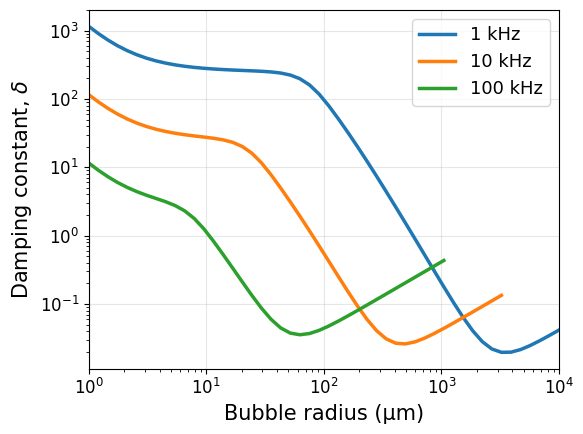

✓ Figure 8.2.2 created and saved to: /Users/wangbinb/Library/CloudStorage/OneDrive-UniversityofMissouri/ONR_project/seaEchoTSCalculator/plots/medwin_clay_fig_8_2_2_damping_constant.pdf


In [8]:
# Create Figure 8.2.2 reproduction: Damping constant vs bubble radius
plt.figure(figsize=(6, 4.5))

# Define colors for each frequency (using more vibrant/distinct colors)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Professional blue, orange, green

# Plot damping constant for each frequency
for freq_idx, freq in enumerate(f_damping):
    plt.plot(a_damping_microns, damping_results[freq], 
             color=colors[freq_idx], linewidth=2.5, 
             label=f'{freq} kHz')

# Formatting to match Medwin & Clay Figure 8.2.2 with larger fonts and LaTeX
plt.xlabel('Bubble radius (μm)', fontsize=15)
plt.ylabel(r'Damping constant, $\delta$', fontsize=15)

# Set logarithmic scales for both axes
plt.xscale('log')
plt.yscale('log')
plt.xlim([1, 10000])

# Add grid and legend with larger font
plt.grid(True, alpha=0.3)
plt.legend(fontsize=13)

# Increase tick label sizes
plt.tick_params(axis='both', which='major', labelsize=12)

# Save figure to main plots folder
plot_path_damping = plots_dir / 'medwin_clay_fig_8_2_2_damping_constant.pdf'
plt.savefig(plot_path_damping, dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

print(f"✓ Figure 8.2.2 created and saved to: {plot_path_damping}")